# Initialization


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
%pylab inline

path2data = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/'

rad_in_deg2 = (np.deg2rad(1.))**2.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 0. # not used

}

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(cosmomc_theta=params['cosmomc_theta'], ombh2=params['ombh2'], omch2=params['omch2'], mnu=0.0, omk=0, \
                   tau=params['tau'])
pars.InitPower.set_params(As=params['As'], ns=params['ns'], r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=2.0)

#Linear spectra
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

[0.81050087]


# CCL

In [3]:
params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 0. # doesnt matter

}


info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c',
        'use_class_sz':False
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'save_dwsmpld': True,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.9,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 5e15,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200m'}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

Initializing binned_clusters_test.py
Downsampling selection function inputs.
Considering full map.
2D likelihood as a function of redshift and signal-to-noise.
Reading data catalog.
Total number of clusters in catalogue = 4195.
SNR cut = 5.0.
Number of clusters above the SNR cut = 2212.
The highest redshift = 1.91
Number of redshift bins = 29.
Number of mass bins for theory calculation 124.
The lowest SNR = 5.001384841152361.
The highest SNR = 53.52369867212418.
Number of SNR bins = 6.
Edges of SNR bins = [0.6  0.85 1.1  1.35 1.6  1.85 2.1 ].
Loading files describing selection function.
Reading Q as a function of theta.
Reading in binned Q function from file.
Reading RMS.
Reading in binned RMS table from file.
Number of rms bins = 5.
Number of Q functions = 5.
Entire survey area = 13211.395702126332 deg2.


qbins: [0.725 0.975 1.225 1.475 1.725 1.975]
zbin: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85]
 Nz for higher resolution =  70


 Total predicted 2D N = 8038.210622215834
Number of clusters in redshift bin 0: 50.79021436010957.
Number of clusters in redshift bin 1: 478.0936054617616.
Number of clusters in redshift bin 2: 917.9435265100251.
Number of clusters in redshift bin 3: 1128.7599876207362.
Number of clusters in redshift bin 4: 1141.4835095541073.
Number of clusters in redshift bin 5: 1032.7049348010692.
Number of clusters in redshift bin 6: 867.1980728174054.
Number of clusters in redshift bin 7: 689.0981340615946.
Number of clusters in redshift bin 8: 524.1810769870393.
Number of clusters in redshift bin 9: 384.62324016259515.
Number of clusters in redshift bin 10: 273.672104934418.
Number of clusters in redshift bin 11: 189.6091373357496.
Number of clusters in redshift bin 12: 128.30214616262856.
Number of clusters in redshift bin 13: 84.97345640880548.
Number of clusters in redshift bin 14: 55.18953114376981.
Number of clusters in redshift bin 15: 35.21771196158942.
Number of clusters in redshift bin 1

 ::: 2D ln likelihood =  8038.210622215836


array([-8038.21062222])

In [4]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 0.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [5]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq_ccl = np.zeros(len(q))
catNq_ccl = np.zeros(len(q))
for i in range(len(q)):
    Nq_ccl[i] = Nzq[:,i].sum()    
    catNq_ccl[i] = catNzq[:,i].sum()

 Total predicted 2D N = 8038.210622215834
Number of clusters in redshift bin 0: 50.79021436010957.
Number of clusters in redshift bin 1: 478.0936054617616.
Number of clusters in redshift bin 2: 917.9435265100251.
Number of clusters in redshift bin 3: 1128.7599876207362.
Number of clusters in redshift bin 4: 1141.4835095541073.
Number of clusters in redshift bin 5: 1032.7049348010692.
Number of clusters in redshift bin 6: 867.1980728174054.
Number of clusters in redshift bin 7: 689.0981340615946.
Number of clusters in redshift bin 8: 524.1810769870393.
Number of clusters in redshift bin 9: 384.62324016259515.
Number of clusters in redshift bin 10: 273.672104934418.
Number of clusters in redshift bin 11: 189.6091373357496.
Number of clusters in redshift bin 12: 128.30214616262856.
Number of clusters in redshift bin 13: 84.97345640880548.
Number of clusters in redshift bin 14: 55.18953114376981.
Number of clusters in redshift bin 15: 35.21771196158942.
Number of clusters in redshift bin 1

[]

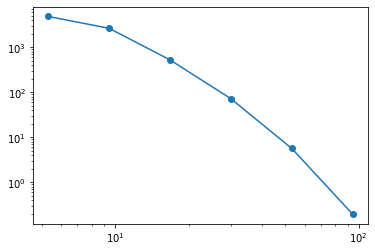

In [6]:
plt.plot(q,Nq_ccl,marker='o')
plt.loglog()

In [7]:
Nz_ccl = np.zeros(len(z))
catNz_ccl = np.zeros(len(z))
for i in range(len(z)):
    Nz_ccl[i] = Nzq[i,:].sum()    
    catNz_ccl[i] = catNzq[i,:].sum()

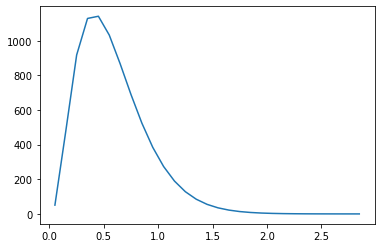

In [9]:
plt.plot(z,Nz_ccl)

# CAMB

In [10]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 0.

}


info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "camb",
        'massfunc_mode': 'internal',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c',
        'use_class_sz' : False
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'average_Q': False,
        'save_dwsmpld': True,
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.9,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 5e15,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

[camb] `camb` module loaded successfully from /usr/local/anaconda3/envs/cluster_counts_environment/lib/python3.8/site-packages/camb
qbins: [0.725 0.975 1.225 1.475 1.725 1.975]
zbin: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85]
 Nz for higher resolution =  70
 ::: 2D ln likelihood =  8025.043492369844


array([-8025.04349237])

In [11]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 0.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [12]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

In [13]:
Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i,:].sum()    
    catNz[i] = catNzq[i,:].sum()

In [14]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

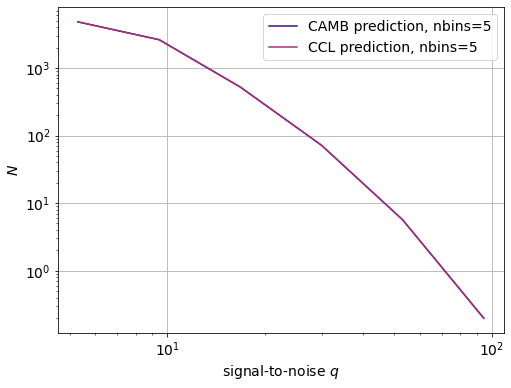

In [16]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2], label='CAMB prediction, nbins=5')
plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
# plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

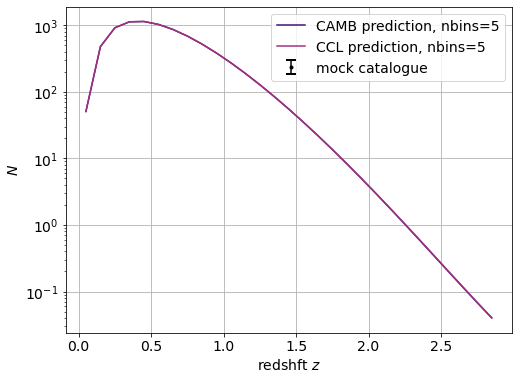

In [17]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[2], label='CAMB prediction, nbins=5')
plt.plot(z, Nz_ccl, color=color_list[6], label='CCL prediction, nbins=5')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('redshft $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

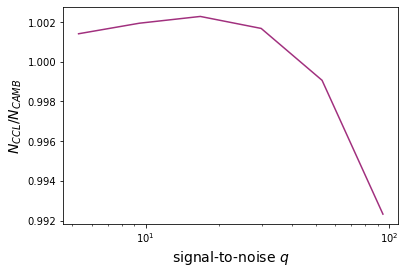

In [18]:
plt.semilogx(q, Nq_ccl/Nq, color=color_list[6])
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{CCL}/N_{CAMB}$', fontsize=14)
plt.show()

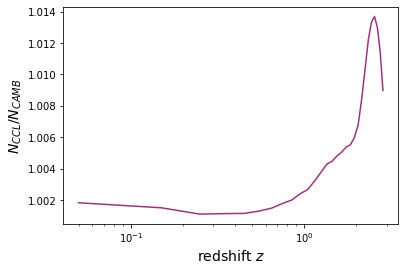

In [19]:
plt.semilogx(z, Nz_ccl/Nz, color=color_list[6])
plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N_{CCL}/N_{CAMB}$', fontsize=14)
plt.show()

useful block to save for class_sz format

In [12]:

datafile_Q_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/QFitdwsmpld_nbins=5.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/RMSTabdwsmpld_nbins=5..npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

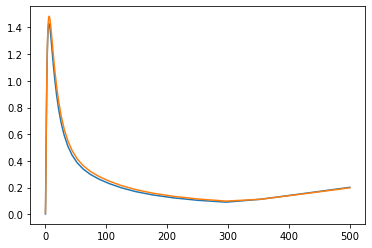

In [13]:
plt.plot(tt500,allQ[:,0])
plt.plot(tt500,allQ[:,1])
plt.show()

In [14]:
np.shape(tt500)
tt500.size

51

In [15]:
noise

array([9.13590715e-06, 1.32191117e-05, 1.73023162e-05, 2.13855207e-05,
       2.54687253e-05])

In [17]:
rad_in_deg2 = (np.deg2rad(1.))**2.
skyfracs/rad_in_deg2/41253.

array([0.0488115 , 0.09714411, 0.10777072, 0.06211241, 0.00441423])

In [9]:
rad_in_deg2 = (np.deg2rad(1.))**2.
datafile_Q_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/QFitdwsmpld_nbins=1.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/RMSTabdwsmpld_nbins=1..npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

In [ ]:
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/'

In [ ]:
# np.savetxt(path_to_catalogue+'so_3freqs_191121_theta500arcmin_Q.txt',np.c_[tt500,Q])
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/'
np.savetxt(path_to_save+'advact_dr5_skyfracs_300621_1bins.txt',np.c_[skyfracs/rad_in_deg2/41253.])

In [ ]:
so_skyfracs = np.loadtxt(path_to_save+'advact_dr5_skyfracs_300621_1bins.txt')
so_ylims = []
for index_thetas in range(tt500.size):
    for id_patches in range(so_skyfracs.size):
        so_ylims.append(noise[id_patches]/allQ[index_thetas,id_patches])
so_ylims = np.asarray(so_ylims)
np.savetxt(path_to_save+'advact_dr5_ylims_300621_1bins.txt',np.c_[so_ylims])
np.savetxt(path_to_save+'advact_dr5_thetas_300621_1bins.txt',np.c_[tt500])

# CLASS SZ

In [52]:
class_sz_params = {
'output' : 'sz_cluster_counts',
'mass function'  : 'T08',
'concentration parameter' : 'B13',
'has_selection_function' : 1,
'experiment' : 1.,
#'sky_area_deg2' : 599.353 # not used when completeness demanded
'y_m_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'class_sz_verbose'  : 0,

'M_min' : 1e13,
'M_max' : 5e15,
    


'N_ur' : 2.0328,
'N_ncdm' : 1,
'm_ncdm' : 0.0,
'T_ncdm' : 0.71611,

'non linear' : 'halofit',


# scaling law parameter
# Hilton et al 2020
'A_ym'  : 4.35e-5,
'B_ym'  : 0.08,
'm_pivot_ym [Msun]' : 3e14,




'bin_z_min_cluster_counts'  : 0.0,
'bin_z_max_cluster_counts'  : 3.0,
'bin_dz_cluster_counts'  : 0.1,
    
'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,
'log10_snr_max' : 2.,    
    
    
# 'dlny' : 0.03,
# 'lnymin' : -11.,
# 'lnymax' : -5.,
#sigmaM_ym = 0.075
'sigmaM_ym' : 0.,
'dlnM_cluster_count_completeness_grid' : 0.05,


'cluster_count_completeness_grid_z_cutoff_low' : 0.2,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,
'dz_cluster_count_completeness_grid_low_z' : 1e-2,
'dz_cluster_count_completeness_grid_mid_z' : 5e-2,
'dz_cluster_count_completeness_grid_high_z' : 5e-2,

'mass_epsrel_cluster_counts' : 1e-5,
'mass_epsabs_cluster_counts' : 1e-50,

'redshift_epsrel_cluster_counts' : 1e-3,
'redshift_epsabs_cluster_counts' : 1e-30,



'signal-to-noise cut-off for survey cluster completeness' : 5,



'100*theta_s': 1.04135,
'n_s': 0.965,
'omega_b': 0.0226576,      
'omega_cdm': 0.1206864, 
'A_s': 2.022662e-9,    
    
# X ray mass bias (if applicable)
'B' : 1.,




# tabulation of mass function:
'n_z_dndlnM' : 100,
'n_m_dndlnM' : 100,

# computation of mass function
# (grid in mass and redshifts for sigma and dsigma)
'ndim_masses' : 100,
'ndim_redshifts' : 100,

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 20.,
'k_min_for_pk_class_sz' : 1e-3,
'k_max_for_pk_class_sz' : 1e1,
'P_k_max_h/Mpc' : 1e1,

'SO_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_thetas_300621.txt',
'SO_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_skyfracs_300621.txt',
'SO_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_ylims_300621.txt'
}


In [53]:
from classy_sz import Class
M = Class()
M.set(class_sz_params)
M.set({
# # 'B_ym': 0.08,
# # 'A_ym': 4.35e-5,
# 'C_ym' : 0.,
# # 'sigmaM_ym' : 0.0,

# 'M_min' : 1e10,
# 'M_max' : 5e15,    
# 'z_min': 1e-5,
# 'z_max':3.,

# 'apply_relativistic_correction_to_y_m':0,
# 'signal-to-noise cut-off for survey cluster completeness' : 5.,
# # 'use_websky_m200m_to_m200c_conversion': 1,

# # 'dlny' : 0.001, #HW used to be 0.01, #step in y integral
# # 'lnymin' : -11., #HW no impact
# # 'lnymax' : 10., #HW no impact

# 'dlnM_cluster_count_completeness_grid' : 0.0005, #HW used to be 0.01, try bigger, big impact on speed


# 'cluster_count_completeness_grid_z_cutoff_low' : 0.5, #HW good value, #integrating over redshift, different regeims
# 'cluster_count_completeness_grid_z_cutoff_mid' : 1.5, #HW no change

# 'dz_cluster_count_completeness_grid_low_z' : 0.01, #HW used to be 0.001
# 'dz_cluster_count_completeness_grid_mid_z' : 0.01, #HW used to be 0.1
# 'dz_cluster_count_completeness_grid_high_z' : 0.01, #HW used to be 1e-1, #try taking bigger steps

# 'mass_epsrel_cluster_counts' : 1e-5, #leave as is
# 'mass_epsabs_cluster_counts' : 1e-50,

# 'redshift_epsrel_cluster_counts' : 1e-3, #leave as is
# 'redshift_epsabs_cluster_counts' : 1e-30,

# # # tabulation of mass function:
# 'n_z_dndlnM' : 150, #HW previously 150
# 'n_m_dndlnM' : 200, #HW previously 150

# # # computation of mass function
# # # (grid in mass and redshifts for sigma and dsigma)
#     #HW these are extremely high, try 80 or 100
# 'ndim_masses' : 250, #HW previoulsy 250, big impact on speed
# 'ndim_redshifts' : 80, #HW previously 250, big impact on speed

# # pk setup for computation of sigma and dsigma
# 'k_per_decade_class_sz' : 100., #HW previously 20, last one I can change
# 'k_min_for_pk_class_sz' : 1e-3, #Don't change below this
# 'k_max_for_pk_class_sz' : 1e1,

# 'P_k_max_h/Mpc' : 1e1,
# 'non linear': 'halofit',

# 'm_pivot_ym [Msun]' : 3e14,   
})
M.compute()

In [54]:
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

h : 0.677322
sigma8 : 0.809357
Omega_m : 0.312457
n_s : 0.965000


In [55]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [56]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
N_clusters_z_theory_with_rel = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][:-1]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))



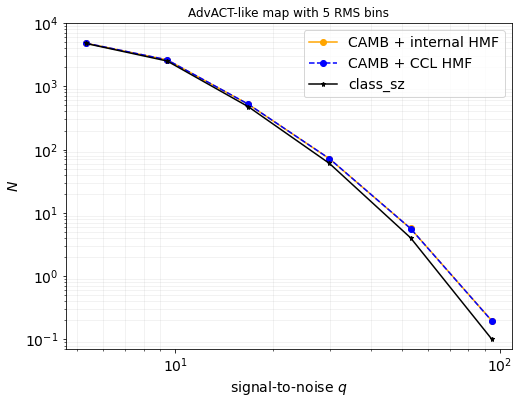

In [62]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color='orange',marker='o', label='CAMB + internal HMF')
plt.plot(q, Nq_ccl, color='blue',ls='--', label='CAMB + CCL HMF',marker='o')
# plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
# plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,
#              yerr=np.sqrt(N_clusters_y_theory),
#              marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')
plt.plot(10**np.asarray(log10y_center[:-1]),N_clusters_y_theory[:-1],
             marker='*',markersize=5.,ls='-',label='class_sz',c='k')

plt.ylim(7e-2,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(which = 'both',alpha = 0.2)
plt.title('AdvACT-like map with 5 RMS bins')
plt.grid()
plt.show()

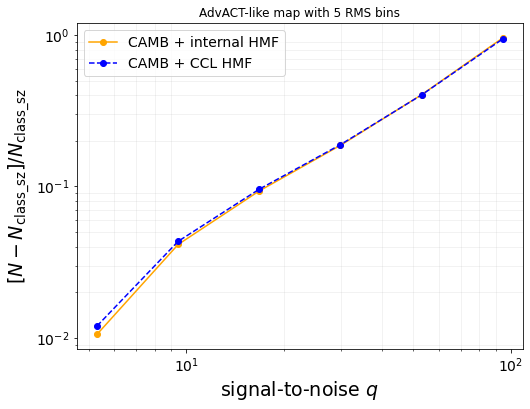

In [75]:
plt.figure(figsize=(8,6))
plt.plot(q, (Nq-N_clusters_y_theory[:-1])/N_clusters_y_theory[:-1], color='orange',marker='o', label='CAMB + internal HMF')
plt.plot(q, (Nq_ccl-N_clusters_y_theory[:-1])/N_clusters_y_theory[:-1], color='blue',ls='--', label='CAMB + CCL HMF',marker='o')
# plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
# plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,
#              yerr=np.sqrt(N_clusters_y_theory),
#              marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')
# plt.plot(10**np.asarray(log10y_center[:-1]),N_clusters_y_theory[:-1],

#              marker='*',markersize=5.,ls='-',label='class_sz',c='k')

# plt.ylim(7e-2,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=19)
plt.ylabel('$[N-N_\mathrm{class\_sz}]/N_\mathrm{class\_sz}$', fontsize=19)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(which = 'both',alpha = 0.2)
plt.title('AdvACT-like map with 5 RMS bins')
plt.grid()
plt.show()

In [63]:
log10y_center

[0.725, 0.975, 1.225, 1.475, 1.725, 1.975, inf]

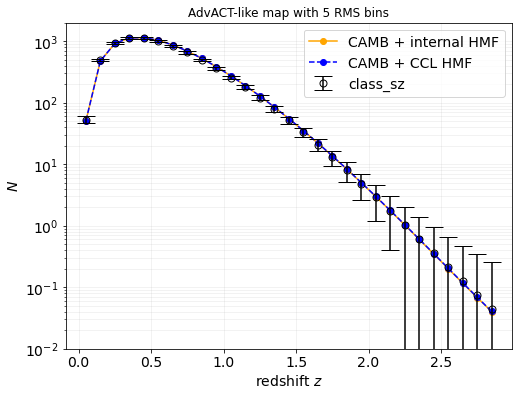

In [61]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color='orange', label='CAMB + internal HMF',marker='o')
plt.plot(z, Nz_ccl, color='blue',ls='--', label='CAMB + CCL HMF',marker='o')
# plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=7.,ls='none',
             label='class_sz',capsize=9,
             markerfacecolor='none',
             c='k')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(1e-2,2e3)
plt.grid(which = 'both',alpha = 0.2)
plt.title('AdvACT-like map with 5 RMS bins')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(z, (Nz-N_clusters_z_theory)/N_clusters_z_theory, color='orange', label='CAMB + internal HMF',marker='o')
plt.plot(z, (Nz_ccl-N_clusters_z_theory)/N_clusters_z_theory, color='blue',ls='--', label='CAMB + CCL HMF',marker='o')
# plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
# plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=7.,ls='none',
#              label='class_sz',capsize=9,
#              markerfacecolor='none',
#              c='k')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$[N-N_\mathrm{class\_sz}]/N_\mathrm{class\_sz}$', fontsize=19)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.ylim(1e-2,2e3)
plt.grid(which = 'both',alpha = 0.2)
plt.title('AdvACT-like map with 5 RMS bins')
plt.show()


# NEMO

Need ~50 rms bins

In [22]:
path2_sim_data = path2data+'DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

In [2]:
import nemo_mocks
import imp
imp.reload(nemo_mocks)

<module 'nemo_mocks' from '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/notebooks/nemo_mocks.py'>

In [3]:




mockconfig = {
    'predSNRCut': 5,
    'path2truthcat': path2_sim_data+'../NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2_sim_data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2_sim_data+'selFn',
    'path2Qfunc': path2_sim_data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01
}


In [4]:
# Make a 'true' mock - use the truth catalog, get true_SNR by looking up noise in the selFn dir
mode = 'without_Q'
truthTab = nemo_mocks.make_truth_mock(mode, mockconfig)

In [31]:
h = 0.68

params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 0.

}




info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2_sim_data,
        'cat_file': 'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits',
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
        
#         'data_path': path2data,
#         'cat_file': "DR5_cluster-catalog_v1.1.fits",
#         'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
#         'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
#         'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"        
        
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c',
        'use_class_sz':False
        
    },
    'YM': {
        'Mpivot': 4.25e14 # andrina has 4.25e14*0.68 but should be in Msun (in boris's version)
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 50,
        'save_dwsmpld': True,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 5e13*0.68,
            'Mmax': 1e16*0.68,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

Initializing binned_clusters_test.py
Downsampling selection function inputs.
Considering full map.
2D likelihood as a function of redshift and signal-to-noise.
Reading data catalog.
Total number of clusters in catalogue = 6522.
SNR cut = 5.0.
Number of clusters above the SNR cut = 2479.
The highest redshift = 1.935
Number of redshift bins = 28.
Number of mass bins for theory calculation 106.
The lowest SNR = 5.003420154903202.
The highest SNR = 43.010754788401286.
Number of SNR bins = 6.
Edges of SNR bins = [0.6  0.85 1.1  1.35 1.6  1.85 2.1 ].
Loading files describing selection function.
Reading Q as a function of theta.
Reading in binned Q function from file.
Reading RMS.
Reading in binned RMS table from file.
Number of rms bins = 50.
Number of Q functions = 50.
Entire survey area = 13631.392731778147 deg2.


 Nz for higher resolution =  68


 Total predicted 2D N = 2756.814306628537
Number of clusters in redshift bin 0: 63.82210082507393.
Number of clusters in redshift bin 1: 281.6298540905071.
Number of clusters in redshift bin 2: 395.7666329491798.
Number of clusters in redshift bin 3: 417.8967130508216.
Number of clusters in redshift bin 4: 382.38421385546644.
Number of clusters in redshift bin 5: 321.7071887855182.
Number of clusters in redshift bin 6: 255.28949054053018.
Number of clusters in redshift bin 7: 193.1130818944539.
Number of clusters in redshift bin 8: 140.9623427503703.
Number of clusters in redshift bin 9: 100.00702104843363.
Number of clusters in redshift bin 10: 69.27343393630217.
Number of clusters in redshift bin 11: 47.02294293588626.
Number of clusters in redshift bin 12: 31.363894816780302.
Number of clusters in redshift bin 13: 20.593854197311313.
Number of clusters in redshift bin 14: 13.334995374510724.
Number of clusters in redshift bin 15: 8.529417632173919.
Number of clusters in redshift bin

 ::: 2D ln likelihood =  230.7458175398654


array([-230.74581754])

In [6]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 0.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [7]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

 Total predicted 2D N = 2756.814306628537
Number of clusters in redshift bin 0: 63.82210082507393.
Number of clusters in redshift bin 1: 281.6298540905071.
Number of clusters in redshift bin 2: 395.7666329491798.
Number of clusters in redshift bin 3: 417.8967130508216.
Number of clusters in redshift bin 4: 382.38421385546644.
Number of clusters in redshift bin 5: 321.7071887855182.
Number of clusters in redshift bin 6: 255.28949054053018.
Number of clusters in redshift bin 7: 193.1130818944539.
Number of clusters in redshift bin 8: 140.9623427503703.
Number of clusters in redshift bin 9: 100.00702104843363.
Number of clusters in redshift bin 10: 69.27343393630217.
Number of clusters in redshift bin 11: 47.02294293588626.
Number of clusters in redshift bin 12: 31.363894816780302.
Number of clusters in redshift bin 13: 20.593854197311313.
Number of clusters in redshift bin 14: 13.334995374510724.
Number of clusters in redshift bin 15: 8.529417632173919.
Number of clusters in redshift bin

In [8]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [9]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']


zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']


qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)
qbins

array([  3.98107171,   7.07945784,  12.58925412,  22.38721139,
        39.81071706,  70.79457844, 125.89254118])

In [10]:
truth_cat, zarr, qarr = nemo_mocks.bin_catalog(truthTab[truthTab['true_SNR']>5], zbins, qbins, SNR_tag='true_SNR')

In [11]:
mockTab = nemo_mocks.make_nemo_mock(mockconfig)

In [12]:
mock_cat, zarr, qarr = nemo_mocks.bin_catalog(mockTab[mockTab['fixed_SNR']>5], zbins, qbins, SNR_tag='fixed_SNR')

In [13]:
Nq_truth = np.zeros(len(q))

for i in range(len(q)):
    Nq_truth[i] = truth_cat[:,i].sum()  

In [14]:
Nz_truth = np.zeros(len(z))

for i in range(len(z)):
    Nz_truth[i] = truth_cat[i,:].sum() 

In [15]:
Nq_mock = np.zeros(len(q))

for i in range(len(q)):
    Nq_mock[i] = mock_cat[:,i].sum() 

In [16]:
Nz_mock = np.zeros(len(z))

for i in range(len(z)):
    Nz_mock[i] = mock_cat[i,:].sum() 

In [17]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

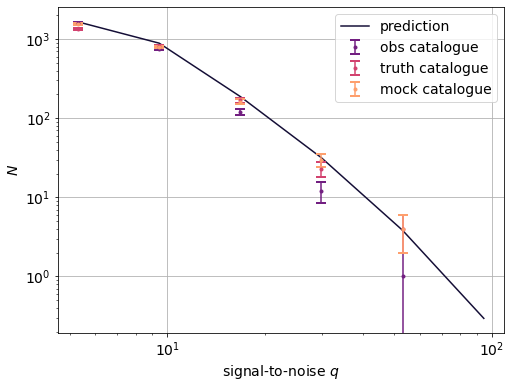

In [18]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], label='prediction')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(q, Nq_truth, yerr=np.sqrt(Nq_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(q, Nq_mock, yerr=np.sqrt(Nq_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [25]:
predNz = nemo_mocks.get_nemo_pred(mockconfig , zbins)

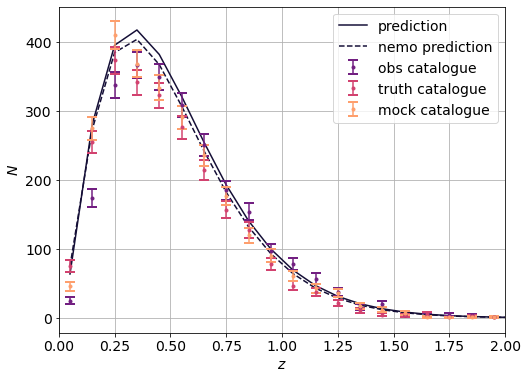

In [26]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='prediction')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='nemo prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(z, Nz_truth, yerr=np.sqrt(Nz_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(z, Nz_mock, yerr=np.sqrt(Nz_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [27]:
np.savetxt(path2_sim_data+'n_of_z_030722_z_ccl_nemo_obs_truth_mock.txt',np.c_[z,Nz,predNz,catNz,Nz_truth,Nz_mock])

In [29]:
np.savetxt(path2_sim_data+'n_of_q_030722_q_ccl_obs_truth_mock.txt',np.c_[q,Nq,catNq,Nq_truth,Nq_mock])

Save the files for class_sz

In [21]:
rad_in_deg2 = (np.deg2rad(1.))**2.
datafile_Q_dwsmpld = path2_sim_data+'selFn/QFitdwsmpld_nbins=50.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = path2_sim_data+'selFn/RMSTabdwsmpld_nbins=50..npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

In [22]:
# np.savetxt(path_to_catalogue+'so_3freqs_191121_theta500arcmin_Q.txt',np.c_[tt500,Q])
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/'
np.savetxt(path_to_save+'nemo_sims_skyfracs_030722_50bins.txt',np.c_[skyfracs/rad_in_deg2/41253.])

In [24]:
so_skyfracs = np.loadtxt(path_to_save+'nemo_sims_skyfracs_030722_50bins.txt')
so_ylims = []
for index_thetas in range(tt500.size):
    for id_patches in range(so_skyfracs.size):
        so_ylims.append(noise[id_patches]/allQ[index_thetas,id_patches])
so_ylims = np.asarray(so_ylims)
np.savetxt(path_to_save+'nemo_sim_ylims_030722_50bins.txt',np.c_[so_ylims])
np.savetxt(path_to_save+'nemo_sim_thetas_030722_50bins.txt',np.c_[tt500])

In [15]:
class_sz_params = {
'output' : 'sz_cluster_counts',
'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
'has_selection_function' : 1,
'experiment' : 1.,
#'sky_area_deg2' : 599.353 # not used when completeness demanded
'y_m_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'class_sz_verbose'  : 0,


'M_min': 5e13*0.68,
'M_max': 1e16*0.68,



'N_ur' : 2.0328,
'N_ncdm' : 1,
'm_ncdm' : 0.0,
'T_ncdm' : 0.71611,

'non linear' : 'halofit',


# scaling law parameter
# Hilton et al 2020
'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'm_pivot_ym [Msun]' : 4.25e14,
'use_m500c_in_ym_relation' : 0,




'bin_z_min_cluster_counts'  : 0.0,
'bin_z_max_cluster_counts'  : 3.0,
'bin_dz_cluster_counts'  : 0.1,
    
'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,
'log10_snr_max' : 2.,    
    
    
# 'dlny' : 0.03,
# 'lnymin' : -11.,
# 'lnymax' : -5.,
#sigmaM_ym = 0.075
'sigmaM_ym' : 0.,
'dlnM_cluster_count_completeness_grid' : 0.05,


'cluster_count_completeness_grid_z_cutoff_low' : 0.2,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,
'dz_cluster_count_completeness_grid_low_z' : 1e-2,
'dz_cluster_count_completeness_grid_mid_z' : 5e-2,
'dz_cluster_count_completeness_grid_high_z' : 5e-2,

'mass_epsrel_cluster_counts' : 1e-5,
'mass_epsabs_cluster_counts' : 1e-50,

'redshift_epsrel_cluster_counts' : 1e-3,
'redshift_epsabs_cluster_counts' : 1e-30,



'signal-to-noise cut-off for survey cluster completeness' : 5,



# '100*theta_s': 1.04135,
# 'n_s': 0.965,
# 'omega_b': 0.0226576,      
# 'omega_cdm': 0.1206864, 
# 'A_s': 2.022662e-9,    
    
'h': 0.68,
'n_s': 0.965,
'Omega_b': 0.049,      
'Omega_cdm': 0.26, 
'sigma8': 0.81,
    
# X ray mass bias (if applicable)
'B' : 1.,




# tabulation of mass function:
'n_z_dndlnM' : 100,
'n_m_dndlnM' : 100,

# computation of mass function
# (grid in mass and redshifts for sigma and dsigma)
'ndim_masses' : 100,
'ndim_redshifts' : 100,

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 20.,
'k_min_for_pk_class_sz' : 1e-3,
'k_max_for_pk_class_sz' : 1e1,
'P_k_max_h/Mpc' : 1e1,

'SO_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nemo_sim_thetas_030722_50bins.txt',
'SO_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nemo_sims_skyfracs_030722_50bins.txt',
'SO_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/nemo_sim_ylims_030722_50bins.txt'
}



In [30]:
from classy_sz import Class
M = Class()
M.set(class_sz_params)
import time 
start = time.time()
M.compute()
end = time.time()
print('class_sz took: %.5e s'%(end-start))

class_sz took: 9.97161e+00 s


In [17]:
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

h : 0.680000
sigma8 : 0.810000
Omega_m : 0.309000
n_s : 0.965000


In [18]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [19]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
N_clusters_z_theory_with_rel = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][:-1]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))

print(N_clusters_z_theory,N_clusters_y_theory)

[64.47020395963763, 283.693543207314, 400.28810063893593, 424.6629673414272, 390.61692446459085, 327.81440976335006, 258.8613372459398, 196.03840178901942, 143.38305104442523, 102.12467460861733, 70.88757183877593, 48.278728662840514, 32.327265273133506, 21.245377644977566, 13.807568447970349, 8.877125028438293, 5.622188271589401, 3.52554802331562, 2.1994945834259707, 1.3605911199104004, 0.8312128530234044, 0.5039750744232988, 0.30491387664860264, 0.18361176140221375, 0.10974847212161906, 0.06498971488175403, 0.03829960473561104, 0.02254088182512269, 0.013252359011678512] [1688.185094616112, 894.049134095307, 185.37742736963298, 30.63166510492725, 3.6387919542973566, 0.2755044154313271, -5.363123171977039e+154]


In [24]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))


In [23]:
z,Nz,predNz,catNz,Nz_truth,Nz_mock = np.loadtxt(path2_sim_data+'n_of_z_030722_z_ccl_nemo_obs_truth_mock.txt',
                                                unpack =True)

q,Nq,catNq,Nq_truth,Nq_mock  = np.loadtxt(path2_sim_data+'n_of_q_030722_q_ccl_obs_truth_mock.txt',
                                          unpack =True)

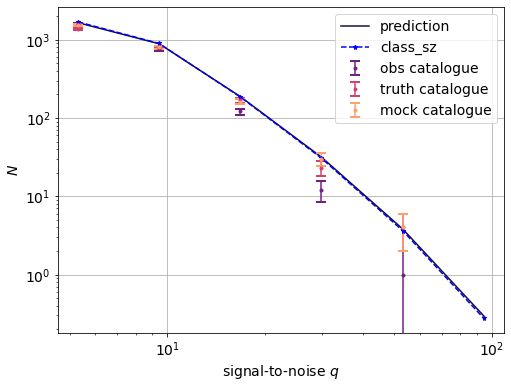

In [27]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], label='prediction')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(q, Nq_truth, yerr=np.sqrt(Nq_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(q, Nq_mock, yerr=np.sqrt(Nq_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')

plt.plot(10**np.asarray(log10y_center[:-1]),N_clusters_y_theory[:-1],
             marker='*',markersize=5.,ls='--',label='class_sz',c='blue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

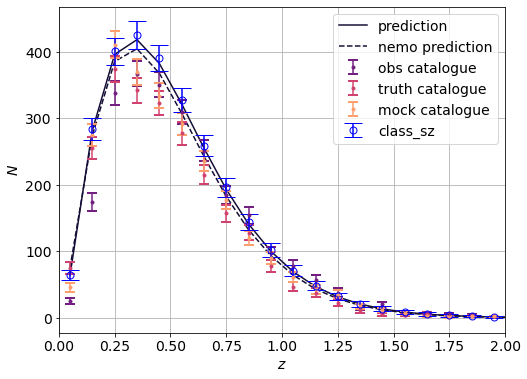

In [28]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='prediction')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='nemo prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(z, Nz_truth, yerr=np.sqrt(Nz_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(z, Nz_mock, yerr=np.sqrt(Nz_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')

plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=7.,ls='none',
             label='class_sz',capsize=9,
             markerfacecolor='none',
             c='blue')

plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()